In [162]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql
from datetime import timedelta, datetime
#### Plotly ####
import ipywidgets
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

#### Import Data ####
conn = sql.connect('C:/Users/Simplon/Desktop/PROJET_FINAL_BEAUTY/App_Beauty_E1/Application_prod.db')
data = pd.read_sql("""SELECT * 
                      FROM Raw_data""", conn)
predict_data = pd.read_sql("""SELECT * 
                      FROM Result_data""", conn)

In [167]:
d_ = data.set_index("index")
p_ = predict_data.set_index("index")
data_new = d_.merge(p_)
data_new['date']= pd.to_datetime(data_new["date"])
data_untouch = data_new.copy()

In [168]:
start_date_n = data_new.date.max()
end_date_n = start_date_n - timedelta(days=7)
start_date_n1 = end_date_n - timedelta(days=1)
end_date_n1 = start_date_n1 - timedelta(days=7)

#filter
data_new = data_new[data_new["date"].between(end_date_n,start_date_n)]
data_last_week = data_untouch[data_untouch['date'].between(end_date_n1,start_date_n1)]

In [196]:
percent_of_buyer_this_week = data_new[data_new.Predict == 1].count() / data_new.count()
percent_of_buyer_this_week = np.round(percent_of_buyer_this_week[0],4)*100

In [197]:
percent_of_buyer_last_week = data_last_week[data_last_week.Predict == 1].count() / data_last_week.count()
percent_of_buyer_last_week = np.round(percent_of_buyer_last_week[0],4)*100

In [204]:
update_layout02 = go.Layout(
  width=250,
  height=250,
  title = "Second KPI"
)

second_kpi_classic = go.Figure(layout= update_layout02)
second_kpi_classic.add_trace(go.Indicator(mode = "number+delta",
                                   value = percent_of_buyer_this_week,
                                   domain = {'x': [0, 0], 'y': [0, 0]},
                                   delta = {'reference': percent_of_buyer_last_week,
                                            'relative': True,
                                            'position' : "bottom",'valueformat':'.2%'},
                                   number = {"font":{"size": 50},"suffix": "%"}))

In [217]:
mean_time_on_site_this_week = data_new.time_on_site.mean()/60 
mean_time_on_site_this_week =round(mean_time_on_site_this_week,2)

mean_time_on_site_last_week = data_last_week.time_on_site.mean()/60 
mean_time_on_site_last_week = round(mean_time_on_site_last_week,2)

In [218]:
mean_time_on_site_last_week

10.9

In [222]:
update_layout03 = go.Layout(
  width=250,
  height=250,
  title = "Troisième KPI"
)

third_kpi_classic = go.Figure(layout= update_layout03)
third_kpi_classic.add_trace(go.Indicator(mode = "number+delta",
                                   value = mean_time_on_site_this_week,
                                   domain = {'x': [0, 0], 'y': [0, 0]},
                                   delta = {'reference': mean_time_on_site_last_week,
                                            'relative': True,
                                            'position' : "bottom",'valueformat':'.2%'},
                                   number = {"font":{"size": 50},"suffix": " min"}))

In [232]:
data_new[['fullVisitorId',"Predict_proba"]].sort_values("Predict_proba",ascending=False).drop_duplicates().head(10)

,fullVisitorId,Predict_proba
589082,5483645126575308983,0.88935
583412,697406646411295375,0.88935
596393,5037987495897455547,0.88935
589297,5271699502780662918,0.88935
596451,4219929932596101654,0.88935
583318,5328419029903205560,0.88935
583260,6805339664591096075,0.88935
587629,7863348778530729830,0.88935
608353,5605568175650836713,0.88935
597289,252620473262931449,0.88935


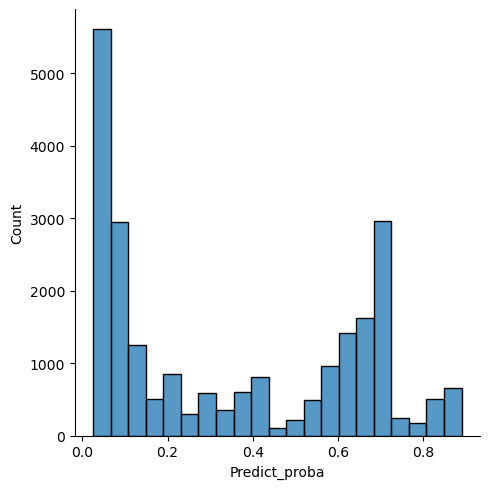

In [235]:
import seaborn as sns 
sns.displot(data_new.Predict_proba)

In [198]:
percent_of_buyer_last_week

31.16

In [148]:
df = data.copy()

In [199]:
percent_of_buyer_this_week

39.43

In [153]:
df.dtypes

level_0                              int64
index                                int64
fullVisitorId                       object
bounces                              int64
time_on_site                         int64
will_buy_on_return_visit             int64
pageviews                          float64
medium                              object
channelGrouping                     object
deviceCategory                      object
country                             object
date                        datetime64[ns]
dtype: object

In [113]:
df = df.groupby("date").agg({"pageviews":"sum",
                                      "time_on_site":"sum",
                                      "medium":"count"})
df = df.reset_index()

In [154]:
start_date_n = df_for_time.date.max()

In [155]:
end_date_n = start_date_n - timedelta(days=7)

In [156]:
start_date_n1 = end_date_n - timedelta(days=1)

In [157]:
end_date_n1 = start_date_n1 - timedelta(days=7)

In [158]:
df['last_week']= df['date'].apply(lambda x : "Dernière semaine" if end_date_n <= x <= start_date_n else  "Historique")
minimum_last = df[df['last_week']=="Dernière semaine"]["date"].min()
df_two = df[df["date"]==minimum_last]
df_two["last_week"]= "Historique"
df = pd.concat([df,df_two])

C:\Users\Simplon\AppData\Local\Temp\ipykernel_16404\1216439994.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [145]:
import plotly.express as px
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = px.line(df, x='date', y='pageviews', color ="last_week",title='Time Series with Rangeslider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [97]:
df_for_time_now = df_for_time[df_for_time["date"].between(end_date_n,start_date_n)]
df_for_time_yersterday = df_for_time[df_for_time["date"].between(end_date_n1,start_date_n1)]

In [98]:
df_for_time["date"].max()

Timestamp('2023-01-31 00:00:00')

In [102]:
df_for_time_yersterday['date'].max()

Timestamp('2023-01-23 00:00:00')

In [103]:
df_for_time_yersterday['date'].min()

Timestamp('2022-12-29 00:00:00')

In [14]:
predict_data.date.max()

'2023-01-31 00:00:00'

In [ ]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import mlflow
import sqlite3 as sql
from datetime import timedelta, datetime

conn = sql.connect('C:/Users/Simplon/Desktop/PROJET_FINAL_BEAUTY/App_Beauty_E1/Application_prod.db')

data = pd.read_sql("""SELECT * 
                      FROM Raw_data""", conn)

data["date"] = pd.to_datetime(data["date"])
today_date = "20230131"
#today_date  = datetime.today()

#today_date = datetime.strptime(date,"%Y%m%d")
last_date = today_date - timedelta(days=32)
focus_data = data.copy()[data['date'].between(last_date,today_date)]
print("---------------------------------------------------------------------------------")

df = focus_data.set_index('fullVisitorId').drop(["country",'medium','date',"index","bounces"],axis=1)
#change categorial columns

categorial = df[['channelGrouping','deviceCategory']]

for i in categorial.columns:
    df[i]= LabelEncoder().fit_transform(df[i])
    df[i].unique()
    
df = df.dropna(axis=0)

print("---------------------------------------------------------------------------------")

logged_model = 'runs:/60cfa1a830df457eb19b304db7987927/model_xgboost'
# Load model as a PyFuncModel.
loaded_model = mlflow.xgboost.load_model(logged_model)
# Predict on a Pandas DataFrame.
result = loaded_model.predict(df)
result_proba = loaded_model.predict_proba(df)[:,1]

print("---------------------------------------------------------------------------------")

data_result = focus_data.copy().dropna(axis=0)
data_result['Predict'] = result
data_result['Predict_proba']= result_proba

result_to_save = data_result[["index","fullVisitorId","date","Predict","Predict_proba"]]


print("---------------------------------------------------------------------------------")


try:
    
    check_date = pd.read_sql("SELECT * FROM Result_data",conn)
    print("Data existing wait to compare")
    
    check_date["date"] = pd.to_datetime(check_date["date"])
    if check_date[check_date["date"].between(last_date,today_date)].count()[0]!= 0 :
        print("Already Trained Data")
        if check_date[check_date["date"].between(last_date,today_date)].count()[0]<(result_to_save.count()[0]*0.85):
            pourcent_trained = round(check_date[check_date["date"].between(last_date,today_date)].count()[0] / result_to_save.count()[0] * 100,2)
            print(f"Data partialy to append check duplicate afterward.\n {pourcent_trained} % of the data already trained")
            result_to_save.to_sql("Result_data",conn, if_exists ="append",index=False)
        else: 
            print("Data trained to more than 85% data dropped")
            
    else:
        print("New Fresh Run append")
        result_to_save.to_sql("Result_data",conn, if_exists ="append",index=False)
        
        
except:
    print("first Run of infering creating table")
    
    result_to_save.to_sql("Result_data",conn, if_exists ="replace",index=False)